In [188]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

In [216]:
dfs = []
for trimester in [1, 2, 3]:
    df = pd.read_excel('../data/PE_placebo_t_test.xlsx', sheet_name=f'{trimester}_trimester')
    df = df[['delta-z (mean(PE) - mean(NO_PE))', 'CHEMICAL_NAME', 'class']]
    df.dropna(inplace=True)
    df.rename(columns={'delta-z (mean(PE) - mean(NO_PE))': f'{trimester}_tr'}, inplace=True)
    df.rename(columns={'CHEMICAL_NAME': ''}, inplace=True)
    df.set_index('', inplace=True)
#     df.rename(index={'CHEMICAL_NAME': ''}, inplace=True)
    
    df.loc[:, 'class'] = df.loc[:, 'class'].apply(lambda x: x.rstrip().replace('\xa0', ''))
    dfs.append(df)
all_df = dfs[0].merge(dfs[1], left_index=True,right_index=True, how='outer').merge(dfs[2], left_index=True,right_index=True, how='outer')
all_df

,1_tr,class_x,2_tr,class_y,3_tr,class
,,,,,,
1-(1-enyl-palmitoyl)-2-arachidonoyl-GPC (P-16:0/20:4)*,NaN,NaN,0.548651,Glycerophospholipids,NaN,NaN
1-arachidonoyl-GPE (20:4n6)*,NaN,NaN,NaN,NaN,0.731991,Glycerophospholipids
1-arachidonoyl-GPI (20:4)*,NaN,NaN,NaN,NaN,0.702413,Glycerophospholipids
1-linoleoyl-GPI (18:2)*,NaN,NaN,-0.579165,Glycerophospholipids,NaN,NaN
1-methylhistidine,NaN,NaN,NaN,NaN,1.056031,Carboxylic acids and derivatives
...,...,...,...,...,...,...
taurine,NaN,NaN,0.428807,Organic sulfonic acids and derivatives,NaN,NaN
threonine,NaN,NaN,NaN,NaN,0.740562,Carboxylic acids and derivatives
tryptophan,NaN,NaN,-0.385711,Indoles and derivatives,NaN,NaN


In [196]:
all_df.loc[:, 'class'] = all_df.loc[:, ['class', 'class_x']].apply(lambda x: x[0] if x[0]==x[0] else x[1],axis=1)
all_df.loc[:, 'class'] = all_df.loc[:, ['class', 'class_y']].apply(lambda x: x[0] if x[0]==x[0] else x[1],axis=1)
all_df = all_df[['1_tr', '2_tr', '3_tr', 'class']]
all_df = all_df.fillna(0)
all_df.sort_values(by='class', inplace=True)
all_df

,1_tr,2_tr,3_tr,class
,,,,
benzoate,-1.114905,0.000000,0.000000,Benzene and substituted derivatives
palmitoyl ethanolamide,0.000000,0.000000,0.892423,Carboximidic acids and derivatives
N-acetylputrescine,0.000000,0.000000,0.736190,Carboximidic acids and derivatives
N-acetylvaline,0.000000,0.000000,0.992743,Carboxylic acids and derivatives
N-acetyltyrosine,0.000000,0.000000,1.057123,Carboxylic acids and derivatives
...,...,...,...,...
behenoyl sphingomyelin (d18:1/22:0)*,0.000000,0.000000,0.622397,Sphingolipids
N-palmitoyl-sphingosine (d18:1/16:0),0.000000,0.000000,0.745678,Sphingolipids
pregnanediol-3-glucuronide,0.000000,0.000000,0.691898,Steroids and steroid derivatives


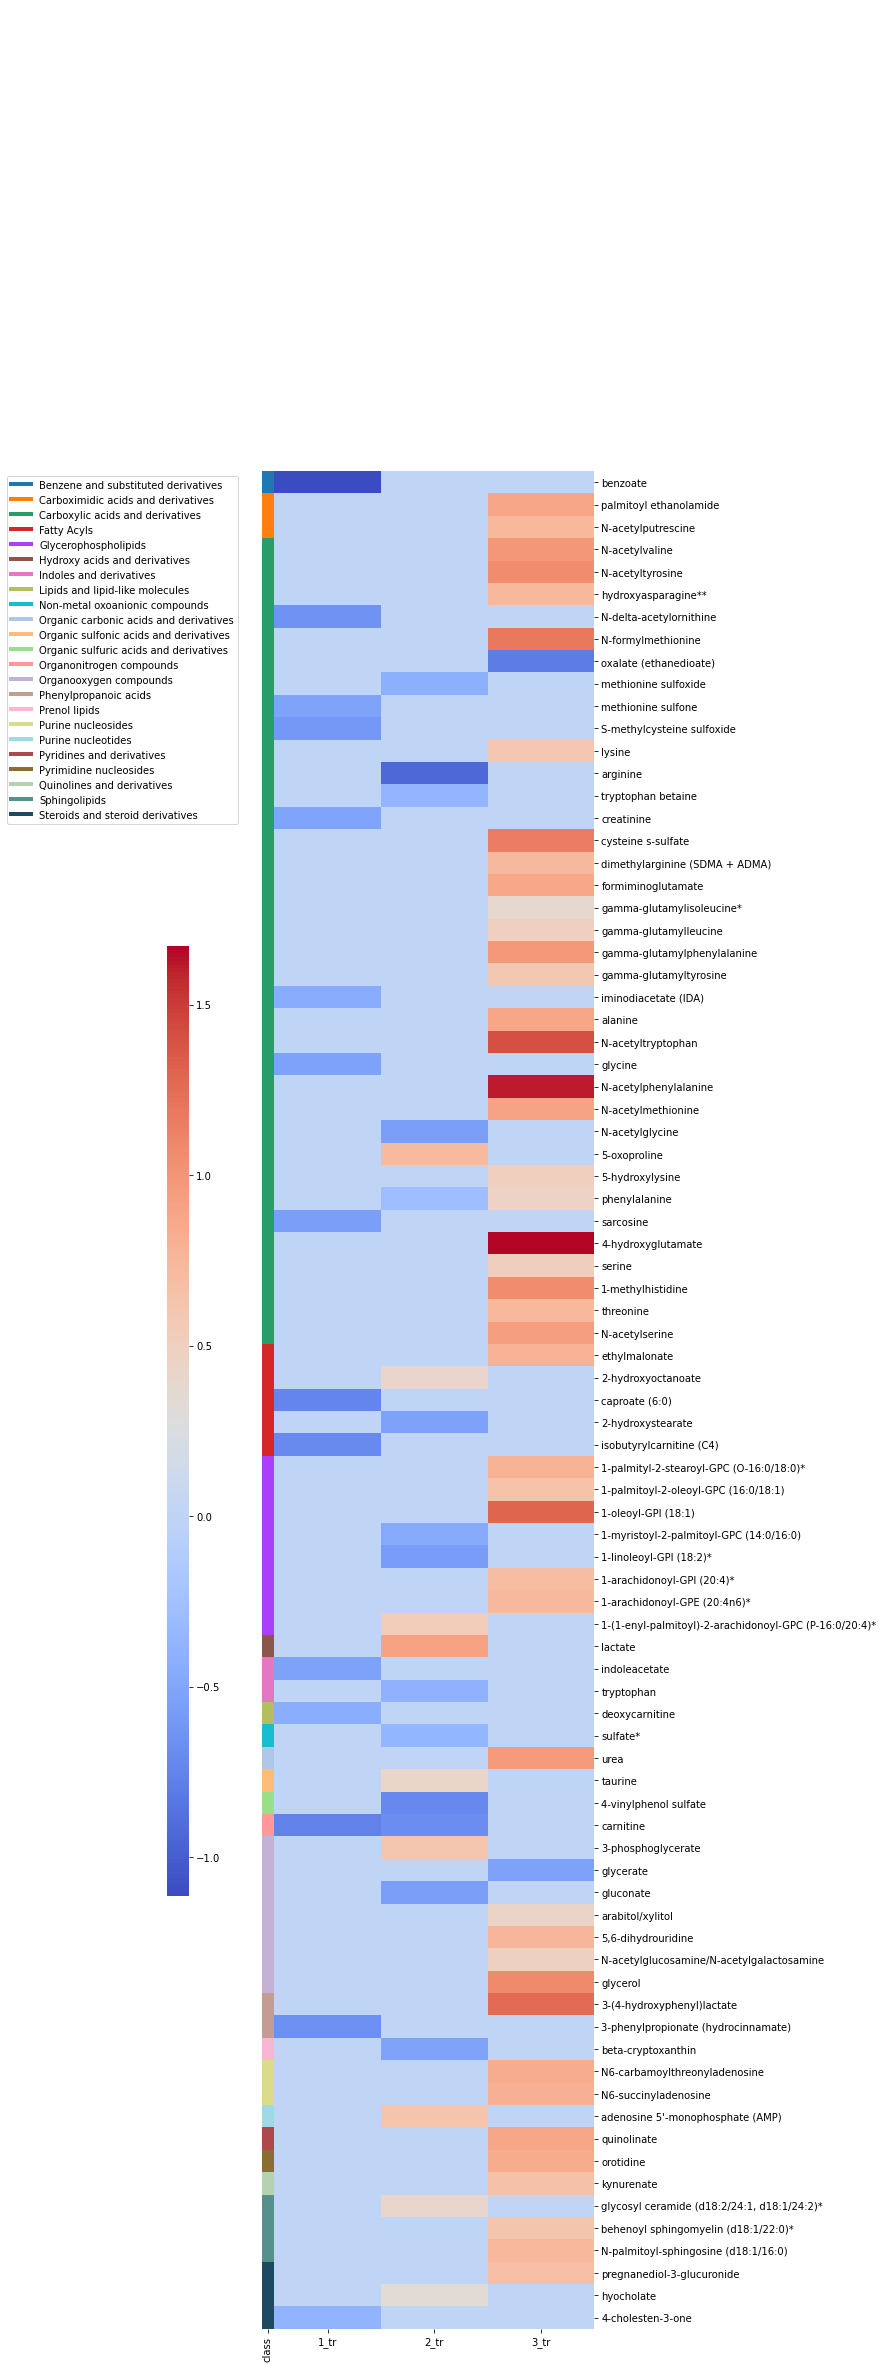

In [215]:
cluster_palette = ["#1f77b4", "#ff7f0e", "#279e68", "#d62728", "#aa40fc", "#8c564b", \
                  "#e377c2", "#b5bd61", "#17becf", "#aec7e8", "#ffbb78", "#98df8a", "#ff9896", \
                  "#c5b0d5", "#c49c94", "#f7b6d2", "#dbdb8d", "#9edae5", "#ad494a", "#8c6d31", "#b4d2b1", "#568f8b", "#1d4a60", "#cd7e59", "#ddb247"]
lut = dict(zip(all_df['class'].unique(), cluster_palette))
row_colors = all_df['class'].map(lut)

g = sns.clustermap(all_df[['1_tr', '2_tr', '3_tr']], 
               row_cluster=False, col_cluster=False, row_colors=row_colors, 
               cmap = sns.color_palette("coolwarm", as_cmap=True), figsize=(10, 33))
g.ax_cbar.set_position((0., .2, .03, .4))


itms = list(lut.items())
labels = [x[0] for x in itms]
colors = [x[1] for x in itms]

# Add legend for classes
custom_lines = []
for col in colors:
    custom_lines.append(Line2D([0], [0], color=col, lw=4))
plt.legend(custom_lines, labels, bbox_to_anchor=(3.5,1.5))

plt.savefig('fig1_heatmap.png', dpi=300, bbox_inches='tight')